# WeatherPy

## James Dietz
## Homework 6
## Data Analytics and Visualization 3
----

### Analyses
* Maximum temperatures tend to increase with proximity to the equator (0 Deg. Latitude). Hemispheric factors in the reversal of seasons tend to complicate this fact.  Perhaps southern hemisphere citis should be plotted separately from northern hemisphere cities in order to remove this factor from affecting the presentation of the data.
* In addition, it would be perhaps useful to examine proximity of city from shore line as a correlate to temperature and other weather data such as humidity, cloudiness, and windspeed.  Nearness to the coast may explain a large chunk of the variance in these data.
* No strong relationship between latitude (nearness to the equator) and humidity, cloudiness, and windspeed was detected.
---



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



605

In [4]:
#Taking a look to see what is there and that it worked.
cities

['tiksi',
 'new norfolk',
 'dikson',
 'taolanaro',
 'diego de almagro',
 'laguna',
 'jinxiang',
 'verkhniy lomov',
 'abu dhabi',
 'villa rica',
 'provideniya',
 'gallup',
 'albany',
 'borba',
 'binzhou',
 'sorland',
 'lebu',
 'punta arenas',
 'umba',
 'puerto el triunfo',
 'beloha',
 'chester',
 'tautira',
 'noumea',
 'hilo',
 'ushuaia',
 'marcona',
 'chuy',
 'pevek',
 'santa isabel',
 'haibowan',
 'rikitea',
 'kota bahru',
 'barentsburg',
 'alotau',
 'sao joao da barra',
 'sobolevo',
 'kapaa',
 'cape town',
 'novomykolayivka',
 'cherskiy',
 'avarua',
 'bluff',
 'jamestown',
 'barrow',
 'usvyaty',
 'illoqqortoormiut',
 'haibara',
 'cairns',
 'upernavik',
 'port alfred',
 'nome',
 'eucaliptus',
 'san patricio',
 'tasiilaq',
 'gouyave',
 'vostok',
 'bredasdorp',
 'bodden town',
 'ancud',
 'bengkulu',
 'hami',
 'kavaratti',
 'guiyang',
 'north bend',
 'kahului',
 'umzimvubu',
 'caravelas',
 'arraial do cabo',
 'vaini',
 'bismarck',
 'kloulklubed',
 'tuatapere',
 'hambantota',
 'makung',
 

## Perform API Calls
* This procedure uses a for loop to peform a series of get requests -- one for each city in cities -- and collects specified data which in appends to lists

JSON
Example of API response:

{"coord":
{"lon":145.77,"lat":-16.92},
"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],
"base":"cmc stations",
"main":{"temp":293.25,"pressure":1019,"humidity":83,"temp_min":289.82,"temp_max":295.37},
"wind":{"speed":5.1,"deg":150},
"clouds":{"all":75},
"rain":{"3h":3},
"dt":1435658272,
"sys":{"type":1,"id":8166,"message":0.0166,"country":"AU","sunrise":1435610796,"sunset":1435650870},
"id":2172797,
"name":"Cairns",
"cod":200}


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
#settings = {"units": "metric", "appid": api_key}

In [7]:
# sets up lists to hold reponse info
lat = []
lon = []
cloudiness = []
pressure = []
windspeed = []
humidity = []
maxtemp = []
date = []
cityname = []
country = []
counter = 1

# Loops through the list of cities and perform a request for data on each.  Prints name of city
# and assigns a number so user can keep track of the request as it is interacting with API.
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing record {counter} for {city}")
        
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        pressure.append(response['main']['pressure'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        maxtemp.append(response['main']['temp_max'])
        date.append(response['dt'])
        cityname.append(response['name'])
        country.append(response['sys']['country'])
    
        counter +=1
        
    except: 
        print("City not found. Skipping...")
        counter += 1
        
print(f"Processed {counter-1} cities' weather data.")
   

Processing record 1 for tiksi
Processing record 2 for new norfolk
Processing record 3 for dikson
Processing record 4 for taolanaro
City not found. Skipping...
Processing record 5 for diego de almagro
Processing record 6 for laguna
Processing record 7 for jinxiang
Processing record 8 for verkhniy lomov
Processing record 9 for abu dhabi
Processing record 10 for villa rica
Processing record 11 for provideniya
Processing record 12 for gallup
Processing record 13 for albany
Processing record 14 for borba
Processing record 15 for binzhou
Processing record 16 for sorland
Processing record 17 for lebu
Processing record 18 for punta arenas
Processing record 19 for umba
Processing record 20 for puerto el triunfo
Processing record 21 for beloha
Processing record 22 for chester
Processing record 23 for tautira
Processing record 24 for noumea
Processing record 25 for hilo
Processing record 26 for ushuaia
Processing record 27 for marcona
City not found. Skipping...
Processing record 28 for chuy
Proc

Processing record 217 for faya
Processing record 218 for camacha
Processing record 219 for vaitape
Processing record 220 for necochea
Processing record 221 for amderma
City not found. Skipping...
Processing record 222 for sur
Processing record 223 for high level
Processing record 224 for sitka
Processing record 225 for nyurba
Processing record 226 for coihaique
Processing record 227 for kutum
Processing record 228 for klaksvik
Processing record 229 for los llanos de aridane
Processing record 230 for sakaiminato
Processing record 231 for podgornoye
Processing record 232 for cabo san lucas
Processing record 233 for aljezur
Processing record 234 for kokopo
Processing record 235 for vite
Processing record 236 for koygorodok
Processing record 237 for kazalinsk
City not found. Skipping...
Processing record 238 for noshiro
Processing record 239 for rabo de peixe
Processing record 240 for namatanai
Processing record 241 for chernyshevskiy
Processing record 242 for yangambi
Processing record 24

Processing record 426 for hobyo
Processing record 427 for bathsheba
Processing record 428 for vechta
Processing record 429 for gewane
Processing record 430 for tumaco
Processing record 431 for olinda
Processing record 432 for srednekolymsk
Processing record 433 for elko
Processing record 434 for berlevag
Processing record 435 for meulaboh
Processing record 436 for bolungarvik
City not found. Skipping...
Processing record 437 for belaya gora
Processing record 438 for inirida
Processing record 439 for loukhi
Processing record 440 for porto velho
Processing record 441 for forestville
Processing record 442 for key west
Processing record 443 for whyalla
Processing record 444 for yulara
Processing record 445 for alta floresta
Processing record 446 for northam
Processing record 447 for tateyama
Processing record 448 for ankang
Processing record 449 for anadyr
Processing record 450 for methoni
Processing record 451 for hovd
Processing record 452 for maldonado
Processing record 453 for uyovu
Pr

## Convert Raw Data to DataFrame


In [8]:
# creating a dictionary of the lists generated from API response info in order to create pandas data frame which 
# allows data to be displayed in a readable way.

weather_dict = {
    "City": cityname,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Maximum_Temp": maxtemp,
    "Cloudiness": cloudiness,
    "Pressure": pressure,
    "Windspeed": windspeed,
    "Humidity": humidity,
    "UnixDate": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Latitude,Longitude,Maximum_Temp,Cloudiness,Pressure,Windspeed,Humidity,UnixDate
0,Tiksi,RU,71.64,128.87,-6.04,56,1019.77,1.87,86,1554520190
1,New Norfolk,AU,-42.78,147.06,19.00,40,1014.00,7.70,39,1554520155
2,Dikson,RU,73.51,80.55,-6.49,76,1000.77,5.87,100,1554520191
3,Diego de Almagro,CL,-26.39,-70.05,14.12,0,1015.65,1.07,85,1554520192
4,Laguna,MX,27.52,-110.01,23.00,5,1012.00,1.50,28,1554514920


In [9]:
#Converting unix formatted date to readable date
convertdate = pd.to_datetime(weather_data['UnixDate'], unit='s')
convertdate

0     2019-04-06 03:09:50
1     2019-04-06 03:09:15
2     2019-04-06 03:09:51
3     2019-04-06 03:09:52
4     2019-04-06 01:42:00
5     2019-04-06 02:35:35
6     2019-04-06 03:09:52
7     2019-04-06 02:00:00
8     2019-04-06 03:09:53
9     2019-04-06 03:09:03
10    2019-04-06 01:53:00
11    2019-04-06 03:06:03
12    2019-04-06 03:09:54
13    2019-04-06 03:09:54
14    2019-04-06 03:09:54
15    2019-04-06 02:00:00
16    2019-04-06 02:52:27
17    2019-04-06 03:09:55
18    2019-04-06 01:50:00
19    2019-04-06 03:09:56
20    2019-04-06 03:09:05
21    2019-04-06 02:52:23
22    2019-04-06 02:30:00
23    2019-04-06 03:09:31
24    2019-04-06 02:00:00
25    2019-04-06 03:05:31
26    2019-04-06 03:08:32
27    2019-04-06 02:00:00
28    2019-04-06 03:05:32
29    2019-04-06 03:10:00
              ...        
506   2019-04-06 03:08:12
507   2019-04-06 03:00:26
508   2019-04-06 02:30:00
509   2019-04-06 03:08:33
510   2019-04-06 03:12:38
511   2019-04-06 02:00:00
512   2019-04-06 03:12:39
513   2019-0

In [12]:
#creates new column to hold readable date
weather_data['Date'] = convertdate

In [13]:
#drops unix date which is no longer necessary and prints final df table.
weather_data.drop(columns=['UnixDate'], inplace=True)
weather_data.head()

,City,Country,Latitude,Longitude,Maximum_Temp,Cloudiness,Pressure,Windspeed,Humidity,Date
0,Tiksi,RU,71.64,128.87,-6.04,56,1019.77,1.87,86,2019-04-06 03:09:50
1,New Norfolk,AU,-42.78,147.06,19.00,40,1014.00,7.70,39,2019-04-06 03:09:15
2,Dikson,RU,73.51,80.55,-6.49,76,1000.77,5.87,100,2019-04-06 03:09:51
3,Diego de Almagro,CL,-26.39,-70.05,14.12,0,1015.65,1.07,85,2019-04-06 03:09:52
4,Laguna,MX,27.52,-110.01,23.00,5,1012.00,1.50,28,2019-04-06 01:42:00


In [ ]:
#Exports to CSV

weather_data.to_csv("weatherdataHW6JSD.csv", encoding='utf-8', index=False)



## Plotting/Visualization of the Data
* This section produces several scatterplots of the data

#### Latitude vs. Temperature Plot

In [17]:
# establishes a uniform title font to be used in all plots.
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}

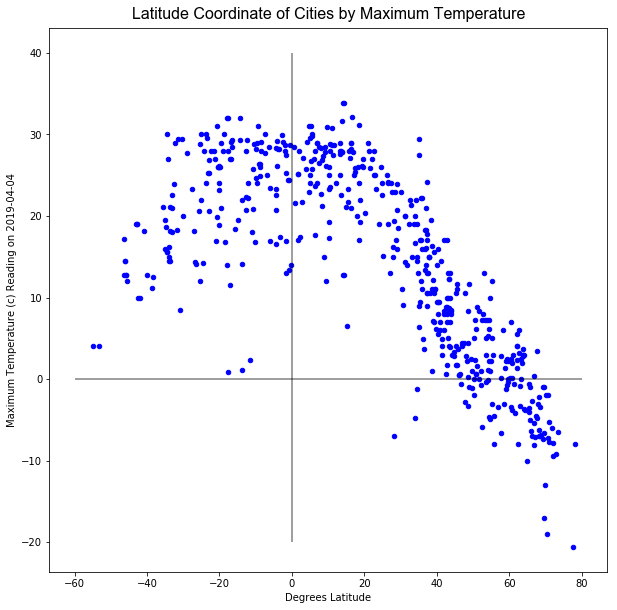

<Figure size 432x288 with 0 Axes>

In [18]:
# scatter plot of latitude v. maximum temperature and formats and saves png.

ax1 = weather_data.plot.scatter(x='Latitude', y='Maximum_Temp', c='Blue')

plt.hlines(0, -60, 80, alpha=0.5)
plt.vlines(0, -20, 40, alpha=0.5)

plt.title("Latitude Coordinate of Cities by Maximum Temperature", fontdict=title_font)
plt.xlabel('Degrees Latitude')
plt.ylabel('Maximum Temperature (c) Reading on 2019-04-04')

# Show plot
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

plt.savefig("latitude_temp.png")

#### Latitude vs. Humidity Plot

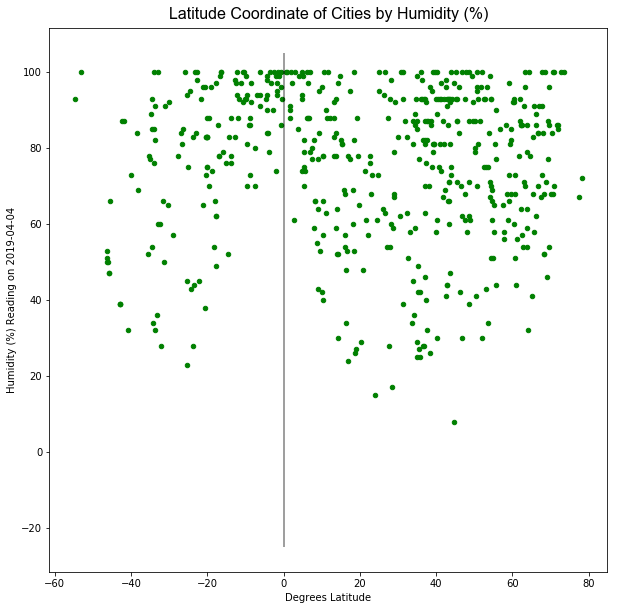

<Figure size 432x288 with 0 Axes>

In [19]:
# scatter plot of latitude v. humidity and formats and saves png.

ax1 = weather_data.plot.scatter(x='Latitude', y='Humidity', c='Green')

plt.vlines(0, -25, 105, alpha=0.5)

plt.title("Latitude Coordinate of Cities by Humidity (%)", fontdict=title_font)
plt.xlabel('Degrees Latitude')
plt.ylabel('Humidity (%) Reading on 2019-04-04')

# Show plot
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

plt.savefig("latitude_humidity.png")

#### Latitude vs. Cloudiness Plot

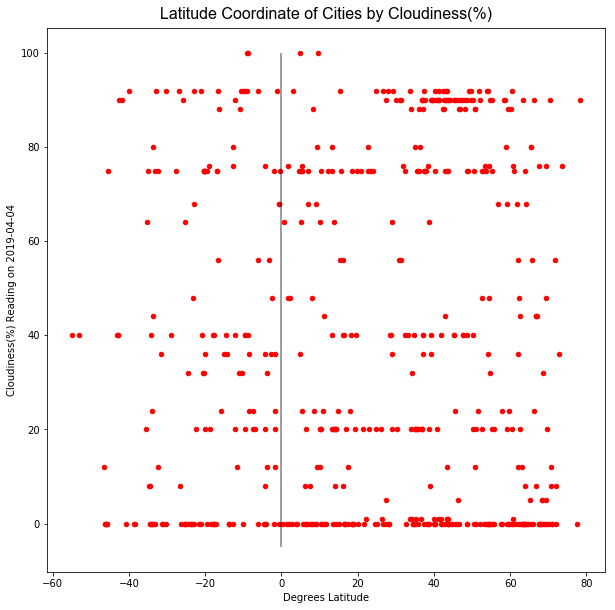

<Figure size 432x288 with 0 Axes>

In [20]:
# scatter plot of latitude v. percent cloud cover and formats and saves png.

ax1 = weather_data.plot.scatter(x='Latitude', y='Cloudiness', c='Red')

plt.vlines(0, -5, 100, alpha=0.5)


plt.title("Latitude Coordinate of Cities by Cloudiness(%)", fontdict=title_font)
plt.xlabel('Degrees Latitude')
plt.ylabel('Cloudiness(%) Reading on 2019-04-04')

# Show plot
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

plt.savefig("latitude_cloudiness.png")

#### Latitude vs. Wind Speed Plot

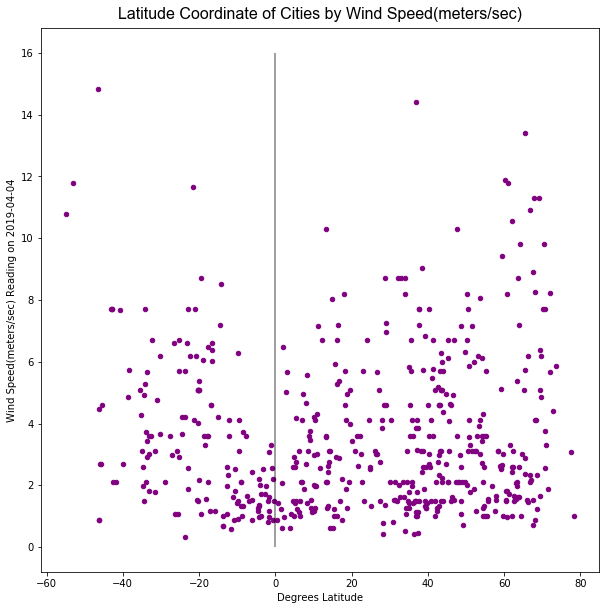

<Figure size 432x288 with 0 Axes>

In [21]:
# scatter plot of latitude v. Wind speed and formats and saves png.

ax1 = weather_data.plot.scatter(x='Latitude', y='Windspeed', c='Purple')

plt.vlines(0, 0, 16, alpha=0.5)

plt.title("Latitude Coordinate of Cities by Wind Speed(meters/sec)", fontdict=title_font)
plt.xlabel('Degrees Latitude')
plt.ylabel('Wind Speed(meters/sec) Reading on 2019-04-04')

# Show plot
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

plt.savefig("latitude_windspeed.png")